In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ip_map = {
    "45.77.229.242": "GB-London",
    "62.154.179.86": "DE-Berlin",
    "194.156.155.241": "ES-Madrid",
    "194.230.35.117": "CH-Zurich",
    # "193.46.104.17": "AT-Vienna", #should be .17 but error
    "193.46.104.12": "AT-Vienna",
    "185.32.189.249": "PT-Lisbon",
    "213.135.49.134": "PL-Warsaw",
    "51.159.68.135": "FR-Paris",
    "185.78.84.3": "TR-Istanbul",
    "185.157.208.248": "GR-Athens"
}

In [3]:
ping_df = pd.read_csv("data/full/ping.csv")

ping_df['src'] = ping_df['src_addr'].map(ip_map)
ping_df['dst'] = ping_df['dst_addr'].map(ip_map)

ping_df['timestamp'] = pd.to_datetime(ping_df['timestamp'], unit='s')
ping_df = ping_df.sort_values('timestamp')

ping_df['pair'] = ping_df['src'] + " - " + ping_df['dst']

print(ping_df)

             dst_addr         src_addr proto  rcvd  sent        min  \
26208  194.230.35.117   213.135.49.134  ICMP     3     3  26.390596   
26207  194.230.35.117    51.159.68.135  ICMP     3     3  17.726252   
26210  194.230.35.117  185.157.208.248  ICMP     3     3  41.533386   
38303  213.135.49.134  185.157.208.248  ICMP     3     3  38.977013   
26209  194.230.35.117      185.78.84.3  ICMP     3     3  48.615360   
...               ...              ...   ...   ...   ...        ...   
74583   45.77.229.242  194.156.155.241  ICMP     3     3  25.909513   
74582   45.77.229.242    51.159.68.135  ICMP     3     3   9.569730   
74587   45.77.229.242      185.78.84.3  ICMP     3     3  44.291965   
74581   45.77.229.242   185.32.189.249  ICMP     3     3  29.492512   
36284  194.230.35.117   185.32.189.249  ICMP     3     3  44.601833   

             max        avg     msm_id           timestamp  prb_id  \
26208  26.545200  26.456732  136909075 2025-11-10 00:00:13    7318   
26207  

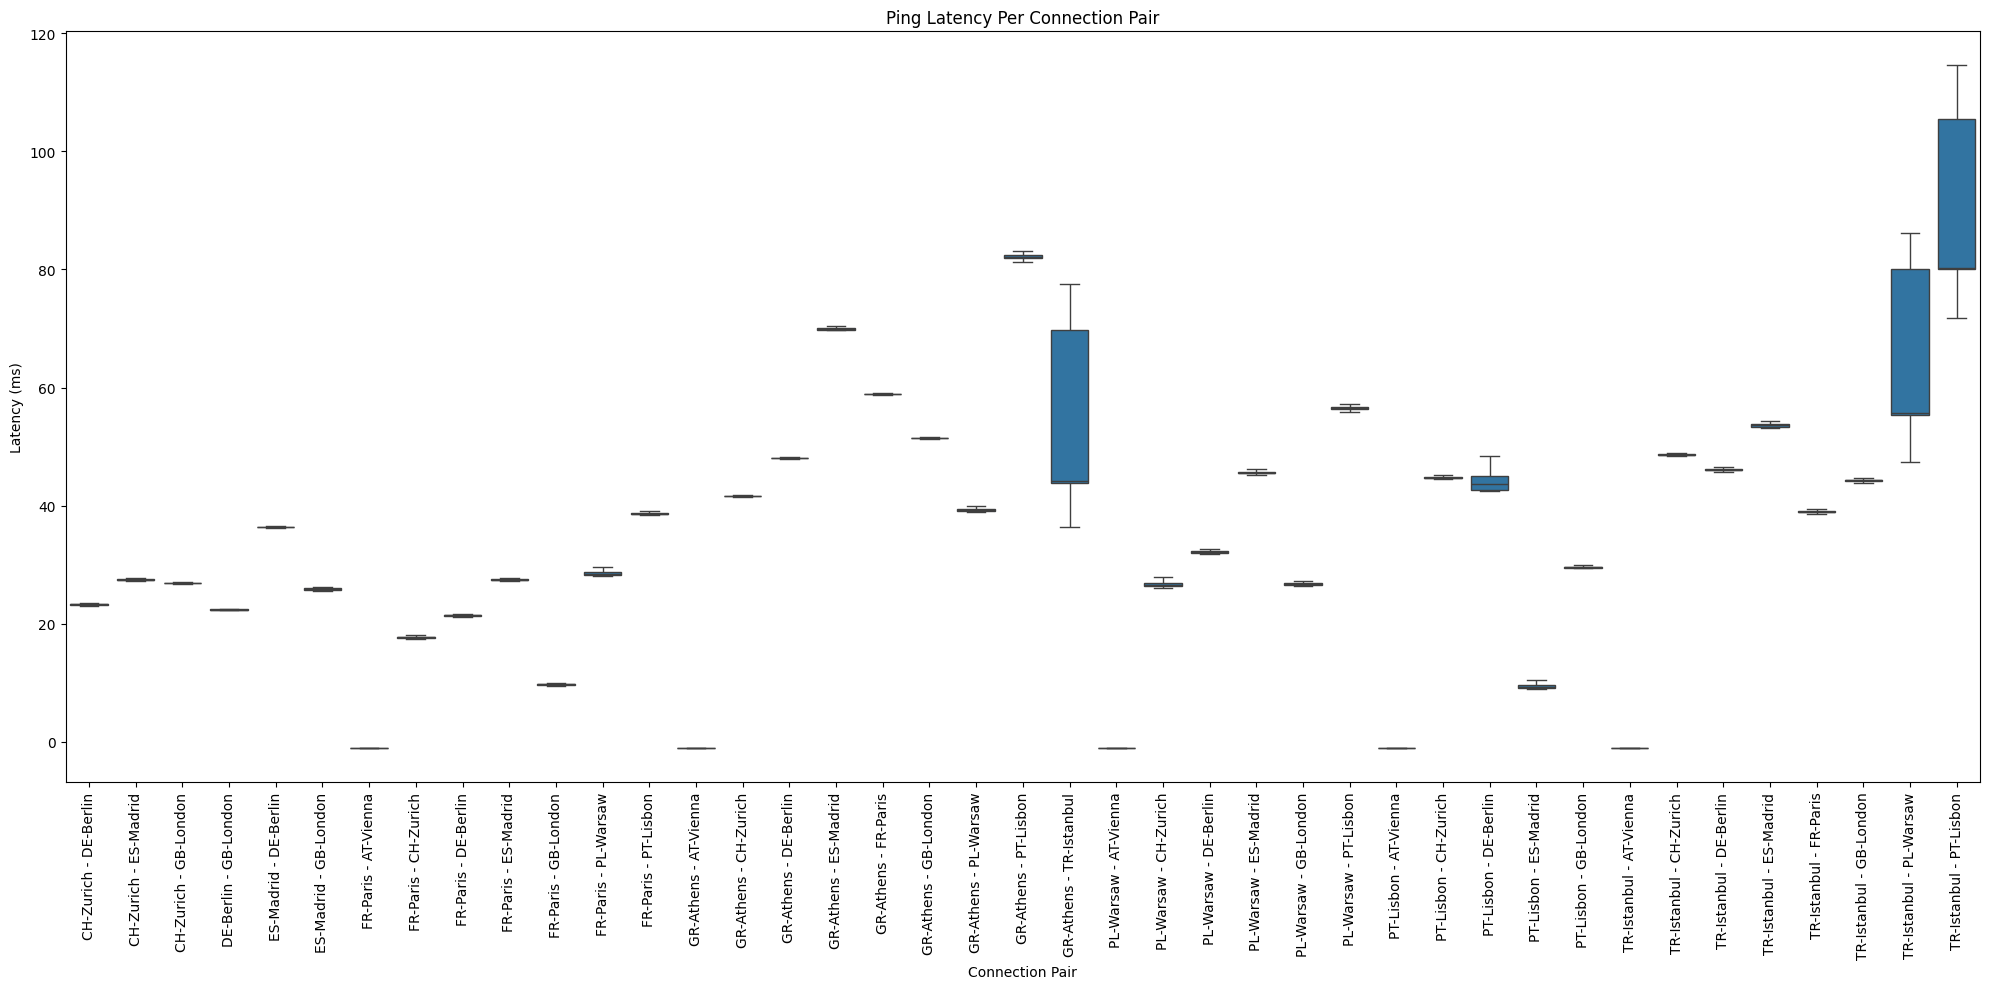

In [7]:
box_ping_data = ping_df.groupby('pair')['avg'].apply(list) 

box_ping_data = box_ping_data.explode().reset_index()
box_ping_data.columns = ["pair", "avg"]


# cleaned = box_ping_data.apply(lambda lst: [x for x in lst if x >= 0]) 

# cleaned_df = cleaned.explode().reset_index()
# cleaned_df.columns = ["pair", "avg"]

plt.figure(figsize=(20,10)) 
sns.boxplot(data=box_ping_data, x="pair", y="avg", showfliers=False)
plt.xticks(rotation=90) 
plt.xlabel("Connection Pair")
plt.ylabel("Latency (ms)")
plt.title("Ping Latency Per Connection Pair")
plt.tight_layout() 
plt.show()